<a href="https://colab.research.google.com/github/mvoassis/churn_detection/blob/main/notebooks/Churn_prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction - EDA
> Marcos Oliveira (mvoassis@gmail.com)

In [1]:
import pandas as pd
import json
import requests

## Loading Data from API data (JSON format)

In [2]:
url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'

response = requests.get(url)

data = response.json()

data = pd.json_normalize(data)
data.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Data cleaning process



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

> 7267 entries, none of them are Nulls.

> Only 3 numeric features? It seems strange. Let's fix the dataset before proceeding to the EDA.

In [4]:
# Checking numeric features

for col in data.select_dtypes(exclude='object').columns:
  print(col)
  print(data[col].unique())
  print()

customer.SeniorCitizen
[0 1]

customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

account.Charges.Monthly
[65.6  59.9  73.9  ... 91.75 68.8  67.85]



In [5]:
# Checking object features:

for col in data.select_dtypes(include='object').columns:
  print(col)
  print(data[col].unique())
  print()

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn
['No' 'Yes' '']

customer.gender
['Female' 'Male']

customer.Partner
['Yes' 'No']

customer.Dependents
['Yes' 'No']

phone.PhoneService
['Yes' 'No']

phone.MultipleLines
['No' 'Yes' 'No phone service']

internet.InternetService
['DSL' 'Fiber optic' 'No']

internet.OnlineSecurity
['No' 'Yes' 'No internet service']

internet.OnlineBackup
['Yes' 'No' 'No internet service']

internet.DeviceProtection
['No' 'Yes' 'No internet service']

internet.TechSupport
['Yes' 'No' 'No internet service']

internet.StreamingTV
['Yes' 'No' 'No internet service']

internet.StreamingMovies
['No' 'Yes' 'No internet service']

account.Contract
['One year' 'Month-to-month' 'Two year']

account.PaperlessBilling
['Yes' 'No']

account.PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

account.Charges.Total
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '370

> **Features to fix:**

1. customerID is useless to a prediction method, should be droped.

2. phone.MultipleLines, internet.OnlineSecurity, internet.OnlineBackup, internet.DeviceProtection, internet.TechSupport, internet.StreamingTV, internet.StreamingMovies: have "No XXX service" values, which maybe could be translated by "No".

3. internet.InternetService, account.Contract, account.PaymentMethod: apply one-hot encoding?

4. account.Charges.Total: convert to float

5. Churn have '' values, that can be used on validation afterwards. Need to be removed from training.

6. Churn, customer.gender, customer.Partner, customer.Dependents, phone.PhoneService, phone.MultipleLines, internet.OnlineSecurity, internet.OnlineBackup, internet.DeviceProtection, internet.TechSupport, internet.StreamingTV, internet.StreamingMovies,account.PaperlessBilling: convert to numeric binary using map().

7. Normalize feature names.




---



### Fixing 1: customerID is useless to a prediction method, should be droped.


In [6]:
data = data.drop('customerID', axis=1)
data.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Fixing 2: phone.MultipleLines, internet.OnlineSecurity, internet.OnlineBackup, internet.DeviceProtection, internet.TechSupport, internet.StreamingTV, internet.StreamingMovies: have "No XXX service" values, which maybe could be translated by "No".

In [7]:
data['phone.MultipleLines'].value_counts()

No                  3495
Yes                 3065
No phone service     707
Name: phone.MultipleLines, dtype: int64

In [8]:
fix_MultipleLines = {'No': 'No',
                     'Yes': 'Yes',
                     'No phone service': 'No'}

data['phone.MultipleLines'] = data['phone.MultipleLines'].map(fix_MultipleLines)

data['phone.MultipleLines'].value_counts()

No     4202
Yes    3065
Name: phone.MultipleLines, dtype: int64

In [9]:
data['internet.OnlineBackup'].value_counts()

No                     3182
Yes                    2504
No internet service    1581
Name: internet.OnlineBackup, dtype: int64

In [10]:
internet_related = ['internet.OnlineSecurity', 'internet.OnlineBackup',
                    'internet.DeviceProtection', 'internet.TechSupport',
                    'internet.StreamingTV', 'internet.StreamingMovies']

fix_internet_related = {'No': 'No',
                        'Yes': 'Yes',
                        'No internet service': 'No'}

for feature in internet_related:
  print(data[feature].value_counts(), end='\n\n')

  data[feature] = data[feature].map(fix_internet_related)

  print(data[feature].value_counts(), end='\n---------------------------\n')



No                     3608
Yes                    2078
No internet service    1581
Name: internet.OnlineSecurity, dtype: int64

No     5189
Yes    2078
Name: internet.OnlineSecurity, dtype: int64
---------------------------
No                     3182
Yes                    2504
No internet service    1581
Name: internet.OnlineBackup, dtype: int64

No     4763
Yes    2504
Name: internet.OnlineBackup, dtype: int64
---------------------------
No                     3195
Yes                    2491
No internet service    1581
Name: internet.DeviceProtection, dtype: int64

No     4776
Yes    2491
Name: internet.DeviceProtection, dtype: int64
---------------------------
No                     3582
Yes                    2104
No internet service    1581
Name: internet.TechSupport, dtype: int64

No     5163
Yes    2104
Name: internet.TechSupport, dtype: int64
---------------------------
No                     2896
Yes                    2790
No internet service    1581
Name: internet.Streami

### Fixing 3: internet.InternetService, account.Contract, account.PaymentMethod: apply one-hot encoding?

> The answer is "No".

Since I intend to apply tree-based models on the classification step, it is not a good idea to apply one-hot encoding on categorical data. The reason is this step increases the sparsity of the dataset, which may impair the performance of tree-based algorithms.

Instead, I'm going to apply **"target encoding"**. However, since this encoding should be applied directly into the train data to avoid data leakage, I'm letting this step to the classification notebook.

However, I'll maintain the (commented) code for the one-hot encoding implemantation bellow:

In [11]:
# from sklearn.preprocessing import OneHotEncoder

# ohe_fix_list = ['internet.InternetService', 'account.Contract', 'account.PaymentMethod']

# for feature in ohe_fix_list:
#   ohe = OneHotEncoder()

#   encoded_feature = ohe.fit_transform(data[[feature]])

#   encoded_df = pd.DataFrame(encoded_feature.toarray(), columns=ohe.get_feature_names_out([feature]))

#   data = pd.concat([data, encoded_df], axis=1)

# data.info()

In [12]:
# # dropping the initial features

# data = data.drop(['internet.InternetService', 'account.Contract', 'account.PaymentMethod'], axis=1)

### Fixing 4: account.Charges.Total: convert to float


In [13]:
pd.get_option('display.max_columns')

20

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
data[data['account.Charges.Total']==" "]

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,No,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,No,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,
1955,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,No,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,
2232,No,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,
2308,No,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,
2930,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,No,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,
3203,No,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [16]:
data[data['account.Charges.Total']==" "]['Churn'].count()

11

There are 11 empty lines. Since all of them represents clients without churn, it is not feasible to substitute them to 0. I'll drop them by now, but fill them using the data distributions also could be a good strategy.

In [17]:
data = data[data['account.Charges.Total']!=" "].copy()

Now, proceeding with the conversion...

In [18]:
data['account.Charges.Total'] = data['account.Charges.Total'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7256 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7256 non-null   object 
 1   customer.gender            7256 non-null   object 
 2   customer.SeniorCitizen     7256 non-null   int64  
 3   customer.Partner           7256 non-null   object 
 4   customer.Dependents        7256 non-null   object 
 5   customer.tenure            7256 non-null   int64  
 6   phone.PhoneService         7256 non-null   object 
 7   phone.MultipleLines        7256 non-null   object 
 8   internet.InternetService   7256 non-null   object 
 9   internet.OnlineSecurity    7256 non-null   object 
 10  internet.OnlineBackup      7256 non-null   object 
 11  internet.DeviceProtection  7256 non-null   object 
 12  internet.TechSupport       7256 non-null   object 
 13  internet.StreamingTV       7256 non-null   objec

### Fixing 5: Churn have **'  '** values. Need to be removed from training.

In [19]:
data_val = data[data['Churn']==''].copy()

In [20]:
data = data[data['Churn']!=''].copy()

### Fixing 6: Churn, customer.gender, customer.Partner, customer.Dependents, phone.PhoneService, phone.MultipleLines, internet.OnlineSecurity, internet.OnlineBackup, internet.DeviceProtection, internet.TechSupport, internet.StreamingTV, internet.StreamingMovies,account.PaperlessBilling: convert to numeric binary using map().

In [21]:
fix_gender = { 'Male': 1,
               'Female' : 0 }

data['customer.gender'] = data['customer.gender'].map(fix_gender)

In [22]:
fix_yes_no = { 'Yes': 1,
               'No' : 0 }

fixlist_yes_no = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
                  'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                  'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling' ]

for feature in fixlist_yes_no:
  data[feature] = data[feature].map(fix_yes_no)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer.gender            7032 non-null   int64  
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   int64  
 4   customer.Dependents        7032 non-null   int64  
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   int64  
 7   phone.MultipleLines        7032 non-null   int64  
 8   internet.InternetService   7032 non-null   object 
 9   internet.OnlineSecurity    7032 non-null   int64  
 10  internet.OnlineBackup      7032 non-null   int64  
 11  internet.DeviceProtection  7032 non-null   int64  
 12  internet.TechSupport       7032 non-null   int64  
 13  internet.StreamingTV       7032 non-null   int64

### Fixing 7: Normalize feature names.

In [23]:
new_names = []
for column in data.columns:
  new_names.append(column.replace('.', '_').replace(' ','_').replace('-','_').replace('_(automatic)',''))

data.columns = new_names
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer_gender            7032 non-null   int64  
 2   customer_SeniorCitizen     7032 non-null   int64  
 3   customer_Partner           7032 non-null   int64  
 4   customer_Dependents        7032 non-null   int64  
 5   customer_tenure            7032 non-null   int64  
 6   phone_PhoneService         7032 non-null   int64  
 7   phone_MultipleLines        7032 non-null   int64  
 8   internet_InternetService   7032 non-null   object 
 9   internet_OnlineSecurity    7032 non-null   int64  
 10  internet_OnlineBackup      7032 non-null   int64  
 11  internet_DeviceProtection  7032 non-null   int64  
 12  internet_TechSupport       7032 non-null   int64  
 13  internet_StreamingTV       7032 non-null   int64

## Extensive Data Analysis (EDA)

### Basic evaluations

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer_gender            7032 non-null   int64  
 2   customer_SeniorCitizen     7032 non-null   int64  
 3   customer_Partner           7032 non-null   int64  
 4   customer_Dependents        7032 non-null   int64  
 5   customer_tenure            7032 non-null   int64  
 6   phone_PhoneService         7032 non-null   int64  
 7   phone_MultipleLines        7032 non-null   int64  
 8   internet_InternetService   7032 non-null   object 
 9   internet_OnlineSecurity    7032 non-null   int64  
 10  internet_OnlineBackup      7032 non-null   int64  
 11  internet_DeviceProtection  7032 non-null   int64  
 12  internet_TechSupport       7032 non-null   int64  
 13  internet_StreamingTV       7032 non-null   int64

In [25]:
data.describe()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


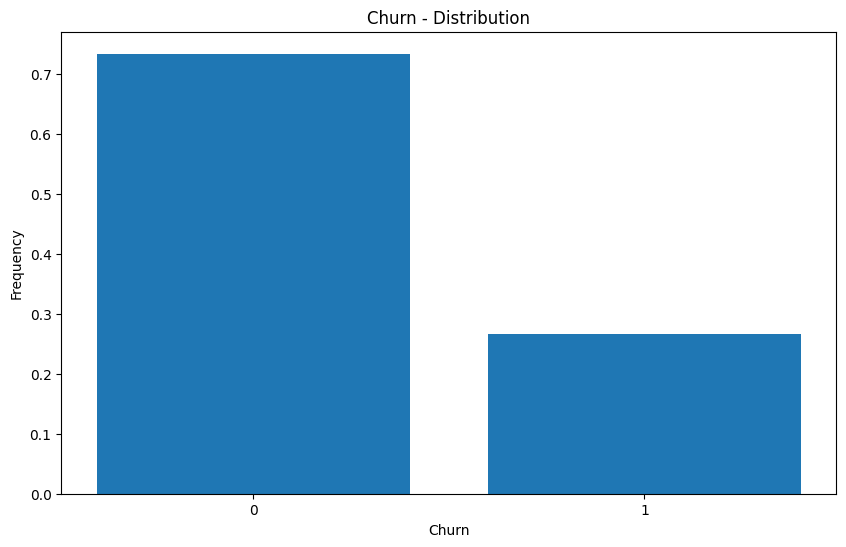

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explorar distribuição da variável alvo
plt.figure(figsize=(10, 6))
plt.bar(data['Churn'].value_counts(normalize=True).index,data['Churn'].value_counts(normalize=True).values)
plt.title('Churn - Distribution')
plt.xlabel('Churn')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.ylabel('Frequency')
plt.show()

### Correlation matrix

1. Evaluate correlation between features and target
2. Evaluate correlation between dependent variables

In [ ]:
!pip install biokit

In [28]:
correlation_matrix = data.corr()
correlation_matrix['Churn'].sort_values(ascending=False)

<ipython-input-28-133745fbe0be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Churn                        1.000000
account_Charges_Monthly      0.192858
account_PaperlessBilling     0.191454
customer_SeniorCitizen       0.150541
internet_StreamingTV         0.063254
internet_StreamingMovies     0.060860
phone_MultipleLines          0.040033
phone_PhoneService           0.011691
customer_gender             -0.008545
internet_DeviceProtection   -0.066193
internet_OnlineBackup       -0.082307
customer_Partner            -0.149982
customer_Dependents         -0.163128
internet_TechSupport        -0.164716
internet_OnlineSecurity     -0.171270
account_Charges_Total       -0.199484
customer_tenure             -0.354049
Name: Churn, dtype: float64

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


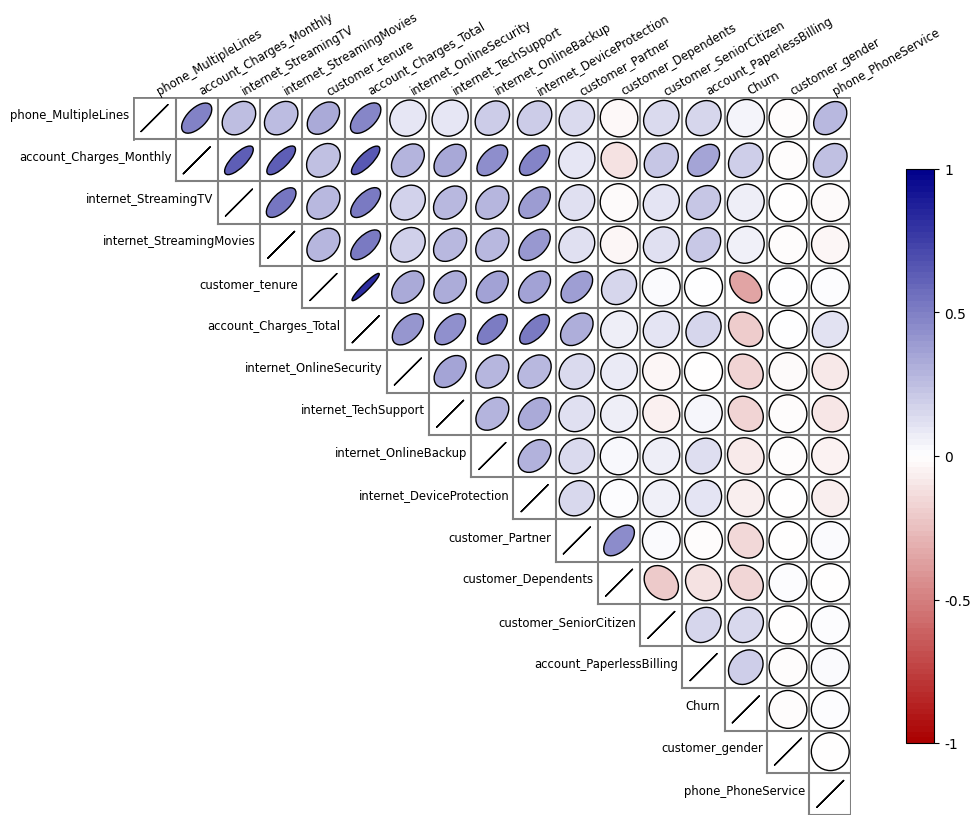

In [29]:
from biokit.viz import corrplot

# correlation_matrix = train_data.drop(['material_5',
#                                       'material_6',
#                                       'measurement_17',
#                                       'measurement_0',
#                                       'attribute_2',
#                                       'attribute_3'],axis=1).corr()

corr_graph = corrplot.Corrplot(correlation_matrix)
corr_graph.plot(upper = 'ellipse', fontsize='small')
fig = plt.gcf()
fig.set_size_inches(15,10)
fig.show()

> Multicollinearity was detected in come of the features. However, as I intend to apply tree based methods to generate the prediction, I'll keep them on the dataset.

### Boxplot of the non binary features

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer_gender            7032 non-null   int64  
 2   customer_SeniorCitizen     7032 non-null   int64  
 3   customer_Partner           7032 non-null   int64  
 4   customer_Dependents        7032 non-null   int64  
 5   customer_tenure            7032 non-null   int64  
 6   phone_PhoneService         7032 non-null   int64  
 7   phone_MultipleLines        7032 non-null   int64  
 8   internet_InternetService   7032 non-null   object 
 9   internet_OnlineSecurity    7032 non-null   int64  
 10  internet_OnlineBackup      7032 non-null   int64  
 11  internet_DeviceProtection  7032 non-null   int64  
 12  internet_TechSupport       7032 non-null   int64  
 13  internet_StreamingTV       7032 non-null   int64

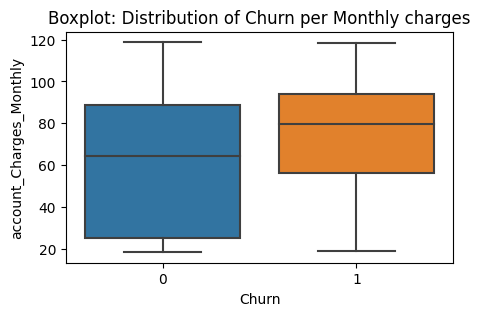

In [31]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=data, x='Churn', y='account_Charges_Monthly')
plt.title('Boxplot: Distribution of Churn per Monthly charges')
plt.show()

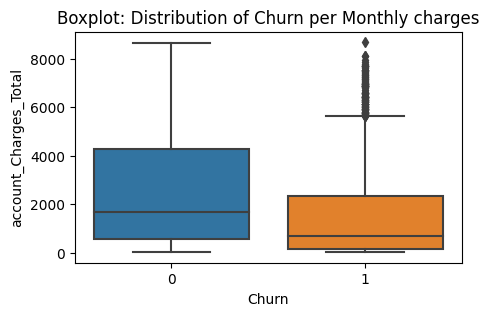

In [32]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=data, x='Churn', y='account_Charges_Total')
plt.title('Boxplot: Distribution of Churn per Monthly charges')
plt.show()

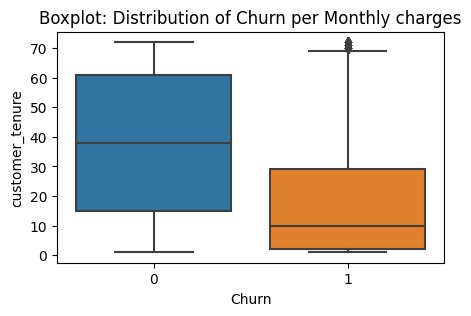

In [33]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=data, x='Churn', y='customer_tenure')
plt.title('Boxplot: Distribution of Churn per Monthly charges')
plt.show()

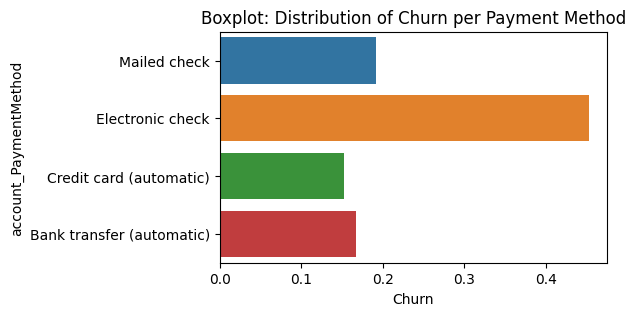

In [43]:
plt.figure(figsize=(5, 3))
sns.barplot(data=data, x='Churn', y='account_PaymentMethod', errorbar=None)
plt.title('Boxplot: Distribution of Churn per Payment Method')
plt.show()


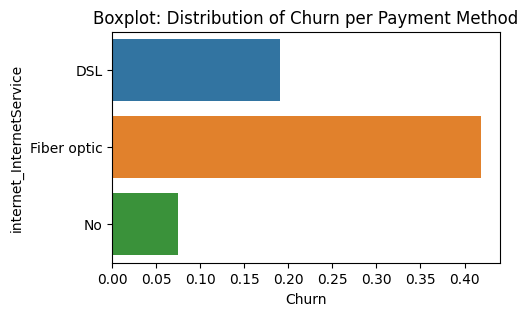

In [45]:
plt.figure(figsize=(5, 3))
sns.barplot(data=data, x='Churn', y='internet_InternetService', errorbar=None)
plt.title('Boxplot: Distribution of Churn per Payment Method')
plt.show()


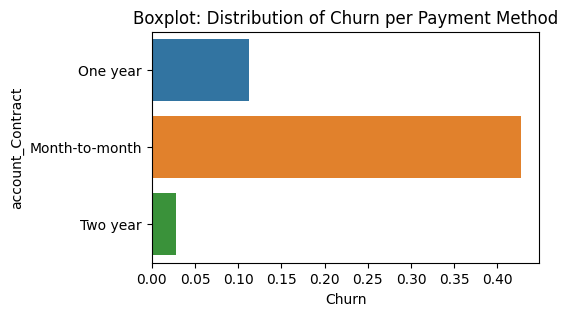

In [46]:
plt.figure(figsize=(5, 3))
sns.barplot(data=data, x='Churn', y='account_Contract', errorbar=None)
plt.title('Boxplot: Distribution of Churn per Payment Method')
plt.show()


In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(data=data, x='Churn', y='account_PaymentMethod', errorbar=None)
plt.title('Boxplot: Distribution of Churn per Payment Method')
plt.show()

### Pairplots

* Visual comparison between target variable and the remaining features.

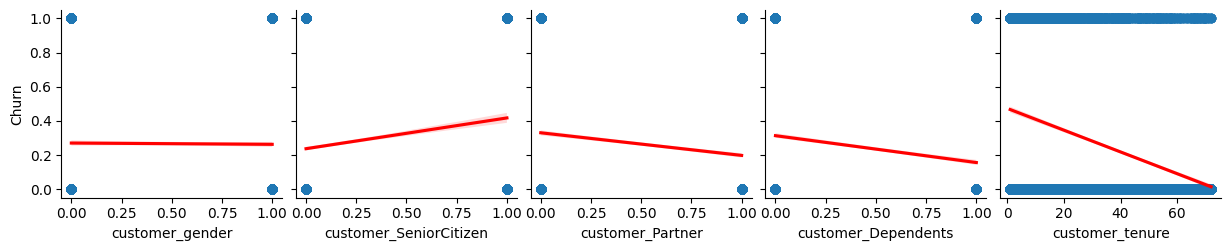

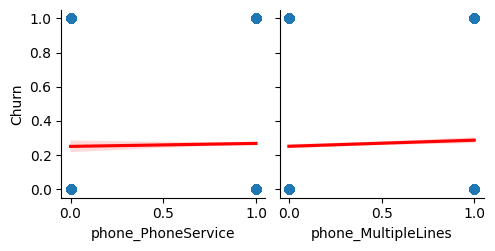

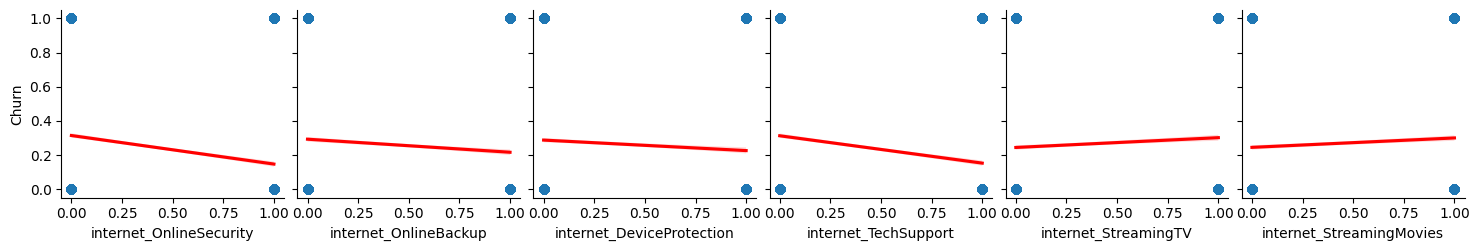

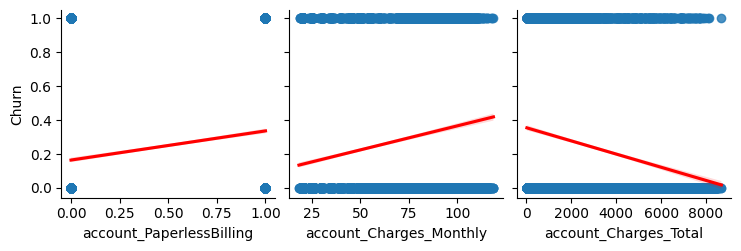

In [47]:
list_features = [['customer_gender','customer_SeniorCitizen','customer_Partner','customer_Dependents', 'customer_tenure'],
           ['phone_PhoneService', 'phone_MultipleLines'],
           ['internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'],
          #  [ 'internet_InternetService_DSL', 'internet_InternetService_Fiber_optic', 'internet_InternetService_No'],
           ['account_PaperlessBilling', 'account_Charges_Monthly', 'account_Charges_Total'],
          #  ['account_Contract_Month_to_month', 'account_Contract_One_year', 'account_Contract_Two_year'],
          #  ['account_PaymentMethod_Bank_transfer', 'account_PaymentMethod_Credit_card', 'account_PaymentMethod_Electronic_check', 'account_PaymentMethod_Mailed_check']
                 ]

for features in list_features:
  ax = sns.pairplot(data,
             y_vars='Churn',
             x_vars=features,
             kind= 'reg',
             plot_kws = {'line_kws' : {'color':'red'}})



## Saving the treated dataset:


In [ ]:
data.to_csv('data_clean_v5.csv', index=False, header=True)

## Main Insights:

- There are 7032 non-null rows 27 features.
  - Most of them are binary features
  - Some were converted to binary using one-hot encoding.
  - Target feature ('Churn') is highly unbalanced (75/25)
  - Feature 'customer_gender' is highly balanced (50/50)

-----

- Correlation results did not show a strong coorelation between the target feature and any of the independent variables.
- Multicollinearity where identified on the independent variables. However, these features were kept, since I intend to use tree-based models on the classifier.

-----

- Mean values for the non-binary features "account_Charges_Monthly", "account_Charges_Total" and "customer_tenure" seems to influence the Churn status. (Boxplot)

-----

- The linear regression of the pairplots confirms the correlation results, visually highlighting the most relevant features regarding Churn values.  